In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Question:1

#### Function to generate the alphabet series

In [2]:
#n is the number of alphabets you want
def alphabet(n):
    space = ''
    for i in range(97 , 97+n):
        space+=chr(i)
    data = list(space)
    return data

In [3]:
index = alphabet(10)
index

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

#### Program to generate 'n' prime-numbers

In [4]:
prime_arr = []
r=30  
for a in range(2,r+1):  
    k=0  
    for i in range(2,a//2+1):  
        if(a%i==0):  
            k=k+1  
    if(k<=0): 
        prime_arr.append(a)
prime_arr

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

#### To print the series 

In [5]:
num_series = pd.Series(prime_arr,index)

In [6]:
num_series

a     2
b     3
c     5
d     7
e    11
f    13
g    17
h    19
i    23
j    29
dtype: int64

## Question:2

In [7]:
table = [['goat' , 'A' , 'A' , 1 , 2] ,['' , '' , 'a' , 2 , 4] ,['' , 'a' , 'A' , 3 , 4] , ['' , '' , 'a' , 4 , 6],
        ['bird' , 'A' , 'A' , 5 , 6] , ['' , '' , 'a' , 6 , 8] , ['' , 'a' , 'A' , 7 , 8] , ['' , '', 'a' , 8 ,10],
        ['llama' , 'A' , 'A' , 9 ,10] , ['' , '' , 'a' , 10 , 12] , ['' , 'a' , 'A' , 11 , 12] , ['' , '' , 'a' , 12 , 14]]
df = pd.DataFrame(data = table , columns = ['animal','parent1','parent2','score1','score2'])
df.set_index(['animal','parent1', 'parent2'] , inplace = True)
df

score1  score2
animal parent1 parent2                
goat   A       A             1       2
               a             2       4
       a       A             3       4
               a             4       6
bird   A       A             5       6
               a             6       8
       a       A             7       8
               a             8      10
llama  A       A             9      10
               a            10      12
       a       A            11      12
               a            12      14

# IRIS data

In [8]:
# Load the iris data along with th following column names
iris_df = pd.read_csv('iris_data/iris.csv' , names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'])

In [9]:
iris_df

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
#To check that our data does not contain any NAN's
iris_df.isna().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

### Question: How many data-point/instances are their ?

In [11]:
data_len = len(iris_df)
data_len

150

#### Question: What is the shape of the data-frame?

In [12]:
iris_df.shape

(150, 5)

### Question: What are the column names? 

In [13]:
iris_df.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

### Question: How many species are included in the data?

In [14]:
# Unique method is used to identify unique data-points
uniq_iris = iris_df['class'].unique()
print('Types of species:' , list(uniq_iris))

Types of species: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


#### First 10 rows

In [15]:
iris_df.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Question:4 Data cleaning 

In [16]:
# iloc points out an integer location to check
iris_df.iloc[34, :]

sepal-length            4.9
sepal-width             3.1
petal-length            1.5
petal-width             0.1
class           Iris-setosa
Name: 34, dtype: object

In [17]:
# The value of petal-width should be 0.2
iris_df.at[34 , 'petal-width'] = 0.2
iris_df.iloc[34, :]

sepal-length            4.9
sepal-width             3.1
petal-length            1.5
petal-width             0.2
class           Iris-setosa
Name: 34, dtype: object

In [18]:
iris_df.iloc[37 , :]

sepal-length            4.9
sepal-width             3.1
petal-length            1.5
petal-width             0.1
class           Iris-setosa
Name: 37, dtype: object

In [19]:
# The value of sepal-width should be 3.6 
# The value of petal-length should be 1.4
iris_df.at[37 , 'sepal-width'] = 3.6
iris_df.at[37 , 'petal-length'] = 1.4
iris_df.iloc[37 , :]



sepal-length            4.9
sepal-width             3.6
petal-length            1.4
petal-width             0.1
class           Iris-setosa
Name: 37, dtype: object

## Question 5: Create two columns Sepal-ratio , Petal-ratio

In [20]:
new_iris_df = iris_df.copy()
new_iris_df['petal-ratio'] = iris_df['petal-length'] / iris_df['petal-width']
new_iris_df['sepal-ratio'] = iris_df['sepal-length'] / iris_df['sepal-width']
new_iris_df.tail()

,sepal-length,sepal-width,petal-length,petal-width,class,petal-ratio,sepal-ratio
145,6.7,3.0,5.2,2.3,Iris-virginica,2.260870,2.233333
146,6.3,2.5,5.0,1.9,Iris-virginica,2.631579,2.520000
147,6.5,3.0,5.2,2.0,Iris-virginica,2.600000,2.166667
148,6.2,3.4,5.4,2.3,Iris-virginica,2.347826,1.823529
149,5.9,3.0,5.1,1.8,Iris-virginica,2.833333,1.966667


## Question 6: Save the data

In [21]:
new_iris_df.to_csv('iris_data/iris_corrected.csv')
corrected_df = pd.read_csv('iris_data/iris_corrected.csv')
corrected_df.drop('Unnamed: 0' ,axis = 1, inplace = True)
corrected_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class,petal-ratio,sepal-ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,7.0,1.457143
1,4.9,3.0,1.4,0.2,Iris-setosa,7.0,1.633333
2,4.7,3.2,1.3,0.2,Iris-setosa,6.5,1.468750
3,4.6,3.1,1.5,0.2,Iris-setosa,7.5,1.483871
4,5.0,3.6,1.4,0.2,Iris-setosa,7.0,1.388889


## Question 7: Use aggregate function on petal-ratio and sepal-ratio

In [22]:
new_iris_df.groupby('class')['sepal-ratio'].aggregate(['mean' , 'median' , 'min' , 'max' , 'std'])

,mean,median,min,max,std
class,,,,,
Iris-setosa,1.470188,1.463063,1.268293,1.956522,0.118750
Iris-versicolor,2.160402,2.161290,1.764706,2.818182,0.228658
Iris-virginica,2.230453,2.169540,1.823529,2.961538,0.246992


In [23]:
new_iris_df.groupby('class')['petal-ratio'].aggregate(['mean' , 'median' , 'min' , 'max' , 'std'])

,mean,median,min,max,std
class,,,,,
Iris-setosa,6.908000,7.000000,2.666667,15.0,2.854545
Iris-versicolor,3.242837,3.240385,2.666667,4.1,0.312456
Iris-virginica,2.780662,2.666667,2.125000,4.0,0.407367


## Question 8: Data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002938E00EB08>,
      dtype=object)

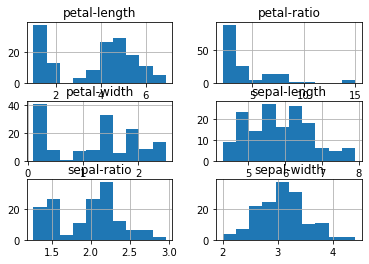

In [24]:
new_iris_df.hist()

#### Scatter-plots

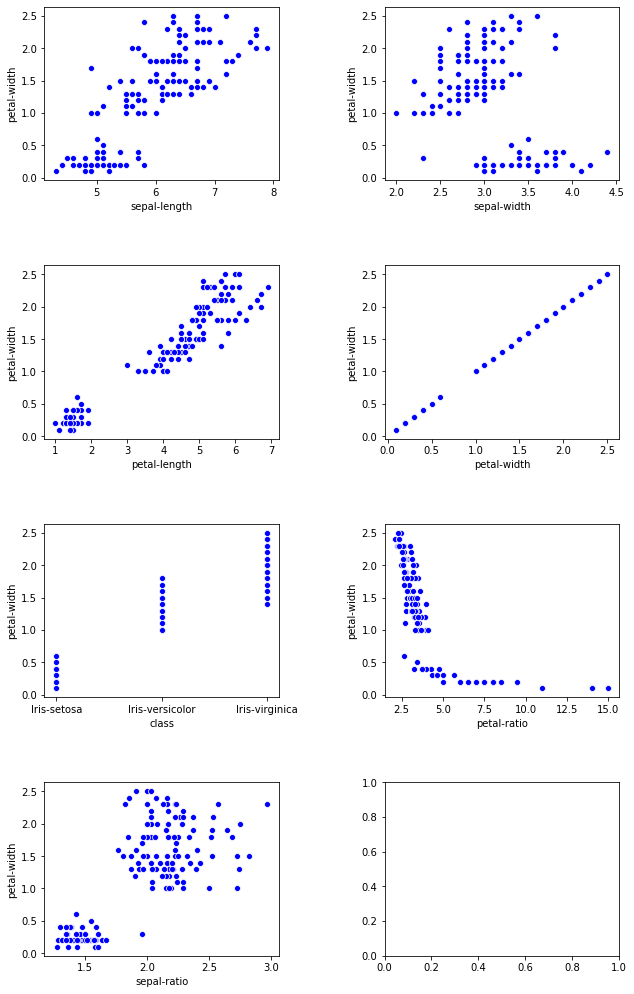

In [25]:
col_list = list(new_iris_df.columns)
fig,ax=plt.subplots(4,2,figsize=(10,15))
def graph(x,y,r,c,title):
    sns.scatterplot(new_iris_df[x],y,color=('blue'),ax=ax[r][c])
    ax[r][c].set_xlabel(x)
    fig.tight_layout(pad=5.0)

for r,col in enumerate(col_list):
    c=r%2
    graph(col,new_iris_df['petal-width'],r//2,c,col)

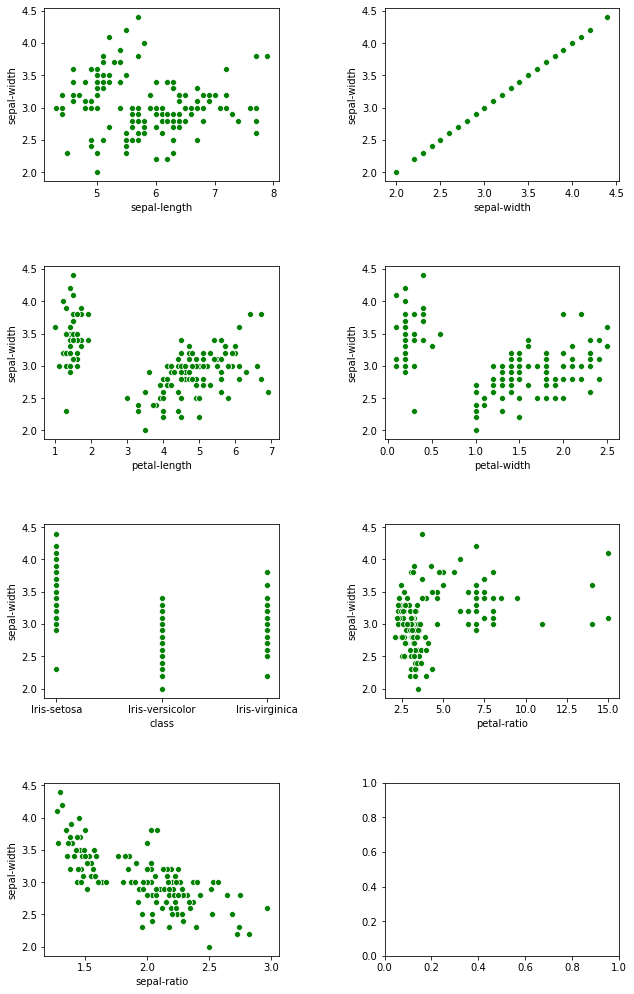

In [26]:
fig,ax=plt.subplots(4,2,figsize=(10,15))
def graph(x,y,r,c,title):
    sns.scatterplot(new_iris_df[x],y,color=('green'),ax=ax[r][c])
    ax[r][c].set_xlabel(x)
    fig.tight_layout(pad=5.0)

for r,col in enumerate(col_list):
    c=r%2
    graph(col,new_iris_df['sepal-width'],r//2,c,col)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002938F20B4C8>,
      dtype=object)

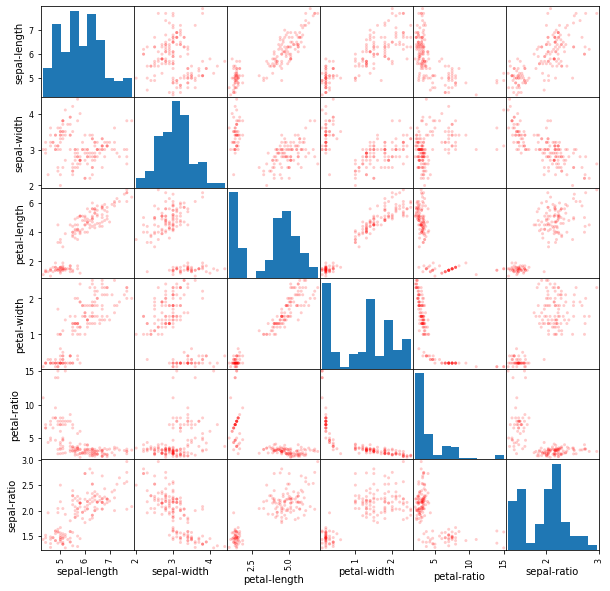

In [27]:
## Scatter matrix
pd.plotting.scatter_matrix( new_iris_df, alpha = 0.2, figsize = (10,10)  , color = 'red' )

## Question 9: Train-test-split

## Using K-nearest-neighbours

In [28]:
# X consist all the feature variables
x = new_iris_df[['sepal-length',
 'sepal-width',
 'petal-length',
 'petal-width',
 'petal-ratio',
 'sepal-ratio']]

# Y is our target variable
y = new_iris_df['class']

# To split the data randomly into 80% training and 20% testing
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 1)

In [29]:
#Using StandardScaler to perform feature scaling
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [30]:
# Implementing the Machine learning algorithm K-nearest neighbours
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [31]:
# Here are our prediction
prediction = classifier.predict(X_test)
print(prediction) 

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


In [32]:
# Here is the accuracy score
print('K-nearest-neighbours accuracy: ' , accuracy_score(y_test, prediction)*100)

K-nearest-neighbours accuracy:  100.0


## Support Vector Clustering SVC

In [33]:
from sklearn.svm import SVC
# Using X_trian , y_train that was declared previously
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction_2 = model.predict(X_test)

# Predictions
print(prediction_2)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


In [34]:
# Accuracy of our results
print("Support Vector Clustring Accuracy: ",accuracy_score(y_test, prediction_2)*100)

Support Vector Clustring Accuracy:  96.66666666666667
